# Week 2: Program to display the summary and statistics of the sheet.
### By: Spandan Sahai (RA2311026010918)

Step 1 - Importing libraries, loading and viewing the dataset:

In [2]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
uploaded = files.upload()
cars_dataset = pd.read_csv("Cars Datasets 2025.csv", encoding="latin1")

print("### Dataset Information ###")
cars_dataset.info()

Saving Cars Datasets 2025.csv to Cars Datasets 2025.csv
### Dataset Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


Step 2 - Previewing the first few rows:

In [ ]:
print("First 5 rows of the Dataset")
cars_dataset.head()

First 5 rows of the Dataset


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


Step 3 - Statistical summary for all columns

In [ ]:
print("Summary of Dataset")
cars_dataset.describe(include="all")

Summary of Dataset


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Mistral,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


Step 4: Check for missing values in the dataset

In [ ]:
print("Number of missing values from each column")
cars_dataset.isnull().sum()

Number of missing values from each column


,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


Step 5 - Checking unique value counts for each column

In [ ]:
print("Number of unique values in each column")
cars_dataset.nunique()

Number of unique values in each column


,0
Company Names,37
Cars Names,1201
Engines,356
CC/Battery Capacity,311
HorsePower,456
Total Speed,114
Performance(0 - 100 )KM/H,180
Cars Prices,535
Fuel Types,23
Seats,19


Step 6 - Plotting the Heatmap

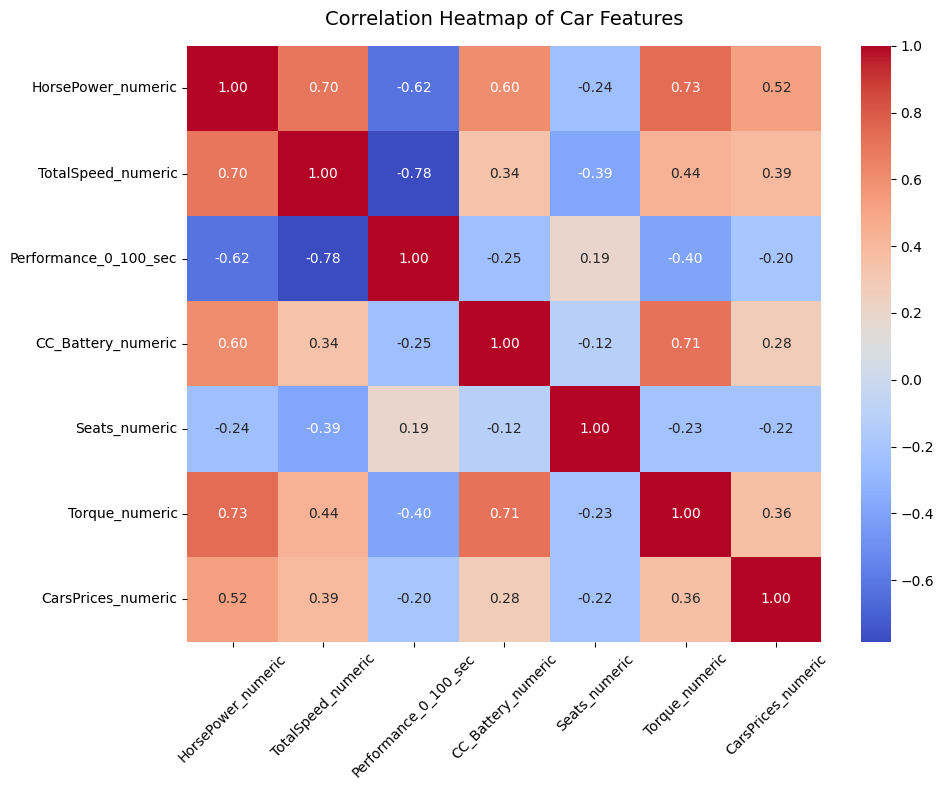

In [4]:
cars_dataset['HorsePower_numeric'] = pd.to_numeric(cars_dataset['HorsePower'].str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['TotalSpeed_numeric'] = pd.to_numeric(cars_dataset['Total Speed'].str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['Performance_0_100_sec'] = pd.to_numeric(cars_dataset['Performance(0 - 100 )KM/H'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
cars_dataset['CC_Battery_numeric'] = pd.to_numeric(cars_dataset['CC/Battery Capacity'].str.replace(',', '').str.extract(r'(\d+)')[0], errors='coerce')
cars_dataset['Seats_numeric'] = pd.to_numeric(cars_dataset['Seats'], errors='coerce')
cars_dataset['Torque_numeric'] = pd.to_numeric(cars_dataset['Torque'].str.extract(r'(\d+)')[0], errors='coerce')

cars_dataset['CarsPrices_numeric'] = (
    cars_dataset['Cars Prices']
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace('/', '-', regex=False)
    .str.split('-').str[0]
    .str.strip()
)
cars_dataset['CarsPrices_numeric'] = pd.to_numeric(cars_dataset['CarsPrices_numeric'], errors='coerce')

numeric_cols = [
    'HorsePower_numeric', 'TotalSpeed_numeric', 'Performance_0_100_sec',
    'CC_Battery_numeric', 'Seats_numeric', 'Torque_numeric', 'CarsPrices_numeric'
]

numeric_df = cars_dataset[numeric_cols].dropna(how='all')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Car Features", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
